# Regresion polinomial


Por lo anterior, ahora debemos de considerar un polinomio de segundo orden para el ajuste, entonces suponemos un modelo de la forma:


\begin{equation*}
	y = a_0 + a_1 x + a_2 x^2 + e,
\end{equation*}


por lo que, entonces buscamos de igual forma obtener el modelo mediante la minimización de los errores, salvo que, ahora es un modelo de segundo orden:
			
            
\begin{equation}
	E = \sum_{i = 1}^n e_i^2 = \sum_{i =1}^n \left( y_i - \overline{y}_i \right)^2 = \sum_{i =1}^n \left( y_i - a_0 - a_1 x_i - a_2 x^2_i\right)^2.
\end{equation}


Siguiendo el proceso, entonces ahora procedemos a determinar las derivadas parciales del método:


\begin{equation*}
    \begin{split}
		\frac{\partial E}{\partial a_0} & = -2\sum_{i =1}^n \left( y_i - a_0 - a_1 x_i - a_2 x^2_i\right) \\
		\frac{\partial E}{\partial a_1} & = -2\sum_{i =1}^n \left( y_i - a_0 - a_1 x_i - a_2 x^2_i\right) x_i \\
		\frac{\partial E}{\partial a_2} & = -2\sum_{i =1}^n \left( y_i - a_0 - a_1 x_i - a_2 x^2_i\right) x^2_i \\
	\end{split}
\end{equation*}
            

Entonces al reajustar las ecuaciones para los coeficientes que determinan el modelo de regresión con un polinomio de segundo orden:


\begin{equation*}
    \begin{split}
		a_0 n + a_1 \sum_{i =1}^n x_i + a_2 \sum_{i =1} x^2_i & = \sum_{i=1} y_i \\
		a_0 \sum_{i =1}^n x_i + a_1 \sum_{i =1} x^2_i + a_2 \sum_{i =1} x^3_i & = \sum_{i=1} x_i y_i \\
		a_0 \sum_{i =1} x^2_i + a_1 \sum_{i =1}^n x^3_i + a_2 \sum_{i =1} x^4_i & = \sum_{i=1} x^2_i y_i \\
	\end{split}
\end{equation*}

### IPN, ESCOM
#### Tarea6, parcial3
#### Alumna: De Luna Ocampo Yanina, profesor: Israel Sánchez Mendoza
#### 06/12/2021

#### Introducción
Esta consiste en otra alternativa, para ajustar polinomios a los datos.
Esta regresión es una forma de regresión lineal en la que la relación entre la variable independiente xy la variable dependiente y es modelada como un polinomio de grado n en x. 
Esta se ajusta a una relación no lineal entre el valor de x y la correspondiente media condicional de y, se ha utilizado para describir fenómenos no lineales con la tasa de crecimiento de los tejidos. 

#### Procedimiento 
Empezaremos importando una nueva librería que es la de pandas, asimismo, librerías para graficar que en este caso es la de matplotlib  y la función del determinante.

In [1]:
import pandas as pd

import numpy as np

from numpy.linalg import det, solve

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuramos los warnings
import warnings
warnings.filterwarnings('ignore')

Continuamos pasando los datos de nuestro ejercicio en un .csv y mandándolo llamar desde el código para que pueda leer todo lo que hemos digitado. 

In [2]:
data = pd.read_csv('tarea.csv')

data

,x,y
0,5,17
1,10,24
2,15,31
3,20,33
4,25,37
5,30,37
6,35,40
7,40,40
8,45,42
9,50,41


Tenemos que determinar el modelo por lo que empezamos determinando la longitud de los datos e imprimimos el número de datos para poder visualizarlos y así, saber hasta qué orden podemos hacer nuestra regresión.

In [3]:
n = len(data)

print('Tenemos {} datos por lo que, podemos hacer una regresión hasta orden {}.'.format(n, n - 1))

Tenemos 10 datos por lo que, podemos hacer una regresión hasta orden 9.


Preguntamos al usuairo qué órden busca determinar la regresión, en este caso será de dos. En caso de poner un número mayor al límite, se avisará que no se puede construir esa regresión.

In [4]:
# Procedemos a preguntar al usuario que orden buscamos determinar la regresión
m = int(input('¿De que orden deseas crear la regresión? \n'))

# Validamos que sea menor que n - 1
if m < n:
    print('Procedemos a crear la regresión')
    
else:
    print('No se puede construir una regresión polinomial de orden ', m)

¿De que orden deseas crear la regresión? 
2
Procedemos a crear la regresión


Definimos la función que utilizaremos, vista en clase, quedando de la siguiente forma:

In [5]:
# Definimos la funcion polinomial
def polinomial(data, m):
    
    # Creamos una matriz y un vector de orden m + 1
    A = np.empty((m+1, m+1))
    b = np.empty(m+1)
    
    for i in range(m+1):
        
        # Asignamos para el vector b
        b[i] = (data['x'] ** i * data['y']).sum()
        
        for j in range(i, m+1):
            
            # Calculamos la suma para la matriz del sistema
            suma = (data ** (i + j)).sum()['x']
            
            # Asignamos en ambas entradas
            A[i,j] = suma
            A[j,i] = suma
    
    # Con el sistema planteado resolvemos el mismo
    c = solve(A,b)
    
    return c

La mandamos llamar con su respectivo orden para poder visualizar el resultado que nos arroja.

In [6]:
polinomial(data, 2)

array([11.76666667,  1.37787879, -0.01606061])

### Realizaremos el mismo procedimiento pero de forma automática
Podremos observar que nos arroja los mismos resultados que el que hemos corrido y mostrado en la parte de arriba.

In [7]:
# Realizamos el mismo procedimiento pero de forma automática

# Creamos las variables
x = data['x'].values
y = data['y'].values

# Importamos de la libreria se scikit-learn la parte de modelos de regresion
from sklearn.linear_model import LinearRegression 

# Importamos las caracteristicas polinomiales de modelos de regresion
from sklearn.preprocessing import PolynomialFeatures 

# Asignamos el orden del polinomio
pf = PolynomialFeatures(degree = 2)

# Creamos un arreglo con 1, x, x^2
X = pf.fit_transform(x.reshape(-1,1))

# Creamos un objeto de regresión
regresion_lineal = LinearRegression()

# Ajustamos el modelo
regresion_lineal.fit(X, y) 

# Imprimimos los resultados
print(('a_0 = ' + str(regresion_lineal.intercept_)) + ', a_i = ' + str(regresion_lineal.coef_[1:]))

a_0 = 11.766666666666246, a_i = [ 1.37787879 -0.01606061]


Si recordamos, hemos puesto las librerías para poder visualizar lo que obtengamos en este método, visualizándolo de la siguiente forma.

In [8]:
# Ahora graficaremos el modelo, por lo que, predeciremos los valores
prediccion_entrenamiento = regresion_lineal.predict(X)

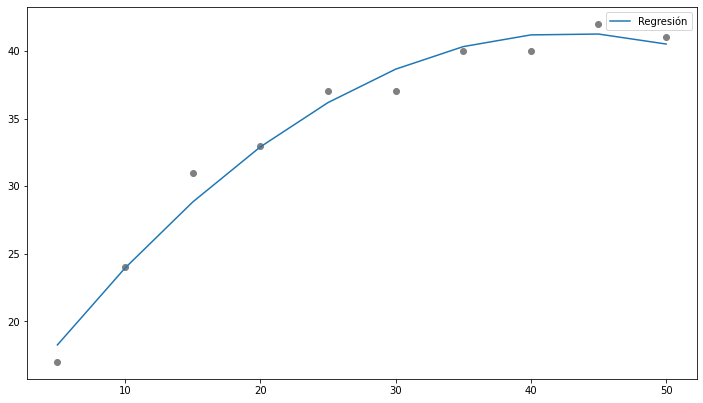

In [9]:
fig, ax = plt.subplots(figsize = (12, 6.84))
ax.scatter(data['x'], data['y'], marker = 'o', color = "gray")
ax.plot(data['x'], prediccion_entrenamiento, linestyle='-', label = "Regresión")
ax.legend();

#### ¿Qué aprendí con esta tarea?
Debemos saber de igual forma que aunque la regresión polinómica se ajusta a un modelo no lineal a los datos, como un problema de estimación estadística, es lineal, en el sentido de que la función de regresión es lineal en los parámetros desconocidos que se calculan a partir de los datos. Por esta razón, la regresión polinomial se considera un caso especial de regresión lineal múltiple.